In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [229]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [240]:
def miss_values(data):
    print('Percentage of missing values:')
    for i in data.columns:
        miss = data[i].isna().sum() / len(data) * 100
        if miss > 0:
            print(f"{i} {round(miss, 2)}%")
            
miss_values(df)

Percentage of missing values:


In [236]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['director'] = df['director'].replace(np.nan, 'no data')
df['cast'] = df['cast'].replace(np.nan, 'no data')
df.dropna(inplace=True)

In [242]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [244]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   int64         
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 789.1+ KB


In [268]:
df["year"] = df["date_added"].dt.year
df["month"] = df["date_added"].dt.month
df["day_of_month"] = df["date_added"].dt.day
df["day_of_week"] = df["date_added"].dt.dayofweek

In [269]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day_of_month,day_of_week
0,s1,TV Show,3%,no data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1,2


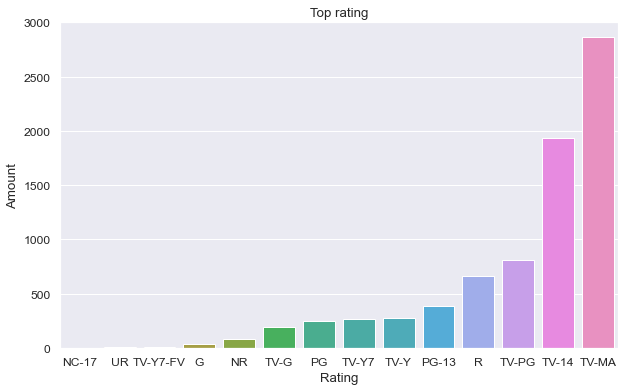

In [76]:
plt.figure(figsize=(10,6))

sns.countplot(x=df['rating'], 
              order=df['rating'].value_counts(ascending=True).index);
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Top rating')
plt.show()

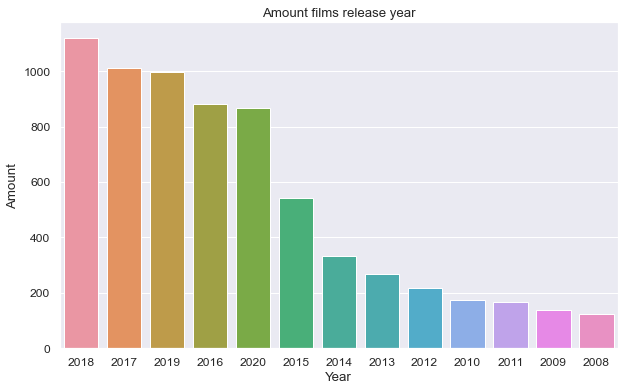

In [75]:
plt.figure(figsize=(10,6))

sns.countplot(x=df['release_year'], 
              order=df['release_year'].value_counts().head(13).index);
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount films release year')
plt.show()

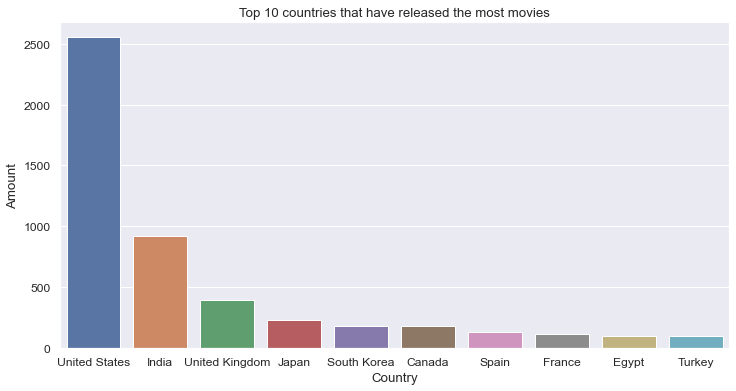

In [74]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1.1)
c = sns.countplot(x=df['country'], 
              order=df['country'].value_counts().head(10).index);
c.axes.set_title('Top 10 countries that have released the most movies')
c.set_xlabel('Country')
c.set_ylabel('Amount')
plt.show()

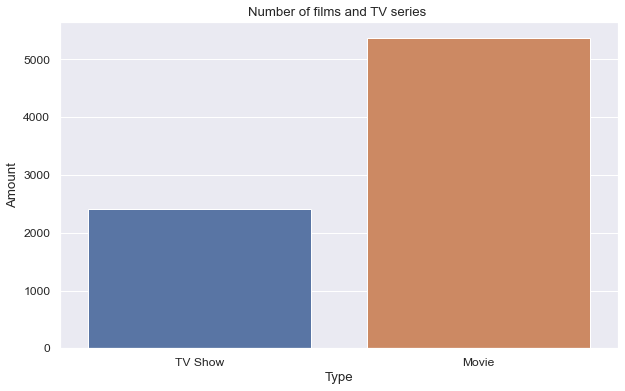

In [79]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.1)
c = sns.countplot(x=df['type']);
c.axes.set_title('Number of films and TV series ')
c.set_xlabel('Type')
c.set_ylabel('Amount')
plt.show()

In [117]:
df['duration'] = df['duration'].map(lambda x: int(x.split(' ')[0]))

In [200]:
print('Average movie length: {} minutes'.format(int(np.mean(df.loc[df['type'] == 'Movie', ['duration']]))))

Average movie length: 99 minutes


In [207]:
print('Average TV shows seasons: {} seasons'.format(int(round(np.mean(df.loc[df['type'] == 'TV Show', ['duration']])))))

Average TV shows seasons: 2 seasons


In [208]:
genre = df['listed_in'].tolist()